# Evaluation of simple linear regression

In this example, we will use a dataset with Youtube statistics. Our aim is to predict the number of views (dependent variable), using the subscribers as a descriptor (independent variable)

In [1]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split #this is the function we need to split the data
from sklearn.linear_model import LinearRegression #remember, this is linear regression model from sk-learn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('youtube.csv')
df.head()

,name,uploads,subscribers,views
0,AP Archive,422326,746325,548619569
1,YTN NEWS,355996,820108,1640347646
2,SBS Drama,335521,1418619,1565758044
3,GMA News,269065,2599175,2786949164
4,MLB,267649,1434206,1329206392


1. Divide the subcribers and views by 1000000, which makes it easier to read.

In [3]:
df['subscribers_m'] = df['subscribers'] / 1000000
df['views_m'] = df['views'] / 1000000

2. Let's look at the relationship between subscribers and views. Choose lmplot, this way you will also get a regression line with confidence interval

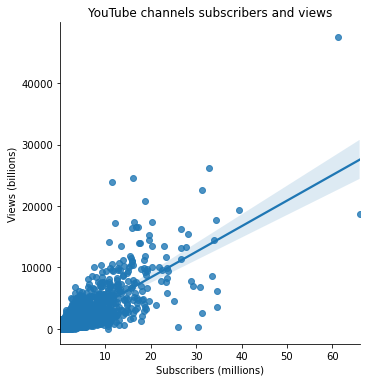

In [4]:
sns.lmplot(x='subscribers_m', y='views_m', data=df)
plt.title('YouTube channels subscribers and views')
plt.xlabel("Subscribers (millions)")
plt.ylabel("Views (billions)")
plt.show()

The band around the regression line is called a "confidence interval" and gives an uncertainty range for the regression line.

Let's evaluate the linear regression assumptions:

- Linearity: the points are around a straight line. **This seems to be okay**
- Equal variance: the distance between the points and the line does not change very much. **This is definitely not the case for higher numbers of subscribers**
- Normality of residuals: we won't delve into this one (it's less important), I just note it for completeness. But it's pretty okay. The residuals are normally distributed.

So, what does it mean that the second assumption is violated? Well, it means the individual predictions might be more off than would normally be expected. We can see this in the graph, by noting that the predictions seem to get worse the higher we get. 

3. Start with splitting the data into test and train data.

In [5]:
x = df[['subscribers_m']] #get the subscribers
y = df['views_m'] #get the views

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=23) #splits the data into train (70%) and test (30%) data

4. Next, create a lineair model

In [6]:
lm = LinearRegression() #create a new (empty model)

lm = lm.fit(x_train, y_train) #fit the model WITH THE TRAIN DATA ONLY

5. Calculate the R^2 and RMSE, *using the test data*. You first of course need to predict the prices. 

In [7]:
y_test_p = lm.predict(x_test) #Generate the predictions and store them in y_test_p. USE ONLY THE TEST DATA HERE
r2_score(y_test, y_test_p) #this gives the model fit (R2) for the Y and predicted Y

0.5564508144058051

In [8]:
math.sqrt(mean_squared_error(y_test, y_test_p)) #this gives the model fit (R2) for the Y and predicted Y

1266.3399904140833

So we get an R2 of 55%, and a RMSE of 1.27. The R2 indicates that 55% of changes in viewers is due to the subscribers, which is not that bad. And the RMSE is 1.27 billion, which is the average error in the prediction. It sounds a lot, but most subscribers have between 0 and 20 billion views.

6. Finally do the same calculations for the total dataset

In [9]:
lm2 = LinearRegression() #create a new (empty model)
lm2.fit(x, y) #fit the model with all the data
y_p = lm2.predict(x)
r2_score(y, y_p) 

0.6260625597036102

We get a much better prediction 62% versus 55%, which is not that strange since we used the same data to train it on. So your model fits very well on this data, but less on new data.

In [10]:
math.sqrt(mean_squared_error(y, y_p)) #this gives the model fit (R2) for the Y and predicted Y

1264.8852393768639

The RMSE is 1.26 billion. Which means that we are typically about 1.26 billion off in our predicted views.